In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def retrieve(id):
    with open(f"results/benchmark/r{id}.txt", "r") as fp:
        rs = fp.read().split('\n')
        inp = rs[2][len("input time: "):].split(", ")
        inp = tuple(map(lambda x: float(x.split("ms")[0]), inp))
        gpu = rs[3][len("gpu time: "):].split(", ")
        gpu = tuple(map(lambda x: float(x.split("ms")[0]), gpu))
        out = rs[4][len("output time: "):].split(", ")
        out = tuple(map(lambda x: float(x.split("ms")[0]), out))
        tot = rs[5][len("total time: "):].split(", ")
        tot = tuple(map(lambda x: float(x.split("ms")[0]), tot))
    return (inp, gpu, out, tot)

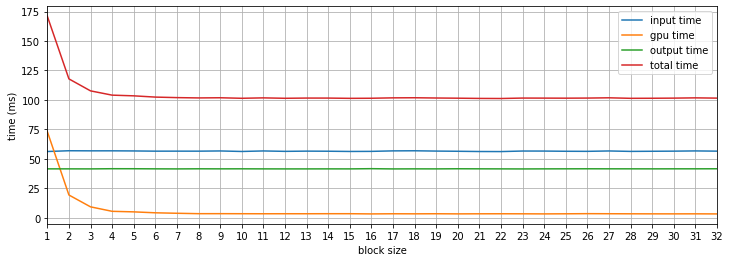

In [3]:
times = []
for i in range(32):
    i, g, o, t = retrieve(i + 1)
    times.append((i[0], g[0], o[0], t[0]))

plt.figure(figsize=(12,4))
plt.xlim(1, 32)
plt.xticks(range(1,33))
plt.grid(True)
plots = plt.plot(range(1, 33), times)
plt.legend(plots, ('input time', 'gpu time', 'output time', 'total time'), loc='best')
plt.xlabel('block size')
plt.ylabel('time (ms)')
plt.savefig("discussion/images/time_diff.pdf")

In [4]:
BLOCK_SIZES = [(4,4), (8,8), (10,10), (16,16), (20,20), (32,32)]
GPUS = ["GTX970", "GTX1080Ti", "RTX2080Ti"]

In [5]:
def speedUp(gpu):
    ret = []
    for bkx, bky in BLOCK_SIZES:
        with open(f"results/{gpu}/benchmark/{gpu}_{bkx}.txt", "r") as fp:
            rs = fp.read().split('\n')
            ret.append(float(rs[8].split("=")[1]))
    return ret

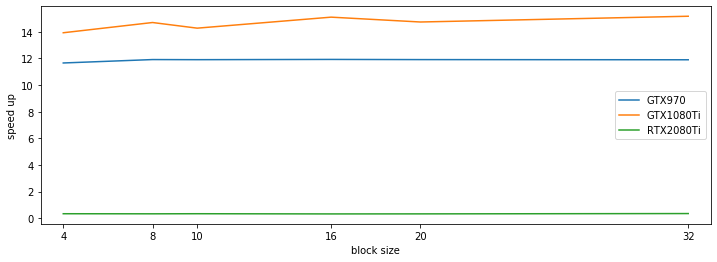

In [6]:
xaxis = [bkx for bkx, bky in BLOCK_SIZES]
yaxis = [[] for _ in BLOCK_SIZES]
for gpu in GPUS:
    s = speedUp(gpu)
    for i in range(len(s)):
        yaxis[i].append(s[i])

plt.figure(figsize=(12,4))
plt.xlim(min(xaxis)-1, max(xaxis)+1)
plt.xticks(xaxis)
plots = plt.plot(xaxis, yaxis)
plt.legend(plots, GPUS, loc='best')
plt.xlabel('block size')
plt.ylabel('speed up')
plt.savefig("discussion/images/speedup.pdf")

In [7]:
def speedUpCPU(gpu):
    ret = []
    for bkx, bky in BLOCK_SIZES:
        with open(f"results/{gpu}/benchmark/{gpu}_{bkx}_cpu.txt", "r") as fp:
            rs = fp.read().split('\n')
            ret.append(float(rs[8].split("=")[1]))
    return ret

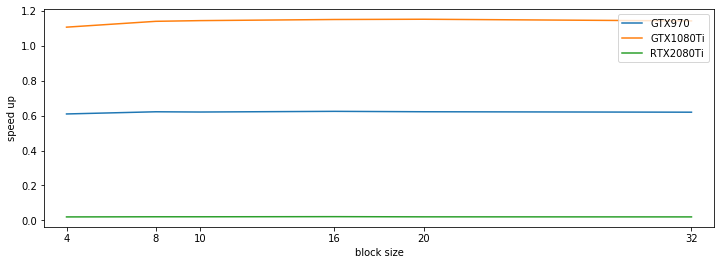

In [8]:
xaxis = [bkx for bkx, bky in BLOCK_SIZES]
yaxis = [[] for _ in BLOCK_SIZES]
for gpu in GPUS:
    s = speedUpCPU(gpu)
    for i in range(len(s)):
        yaxis[i].append(s[i])

plt.figure(figsize=(12,4))
plt.xlim(min(xaxis)-1, max(xaxis)+1)
plt.xticks(xaxis)
plots = plt.plot(xaxis, yaxis)
plt.legend(plots, GPUS, loc='best')
plt.xlabel('block size')
plt.ylabel('speed up')
plt.savefig("discussion/images/speedup_cpu.pdf")